<a href="https://colab.research.google.com/github/ManikantaMandlem/Activity-Recognition-using-DNN/blob/main/Mani_activity_detection_raw_data_fulldata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Model
from keras import layers, losses, Sequential
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None)
import tensorflow as tf
import keras
#import tensorflow as tf

In [ ]:
with open('/content/drive/MyDrive/mHealth/project2/ascending_stairs_full.csv', 'r', encoding='utf-8-sig') as f: 
    asc_data = np.genfromtxt(f,delimiter = ',')
with open('/content/drive/MyDrive/mHealth/project2/dancing_full.csv', 'r', encoding='utf-8-sig') as f: 
    dance_data = np.genfromtxt(f,delimiter = ',')
with open('/content/drive/MyDrive/mHealth/project2/descending_stairs_full.csv', 'r', encoding='utf-8-sig') as f: 
    des_data = np.genfromtxt(f,delimiter = ',')
with open('/content/drive/MyDrive/mHealth/project2/jumping_full.csv', 'r', encoding='utf-8-sig') as f: 
    jump_data = np.genfromtxt(f,delimiter = ',')
with open('/content/drive/MyDrive/mHealth/project2/sitting_full.csv', 'r', encoding='utf-8-sig') as f: 
    sit_data = np.genfromtxt(f,delimiter = ',')
with open('/content/drive/MyDrive/mHealth/project2/standing_full.csv', 'r', encoding='utf-8-sig') as f: 
    stand_data = np.genfromtxt(f,delimiter = ',')
with open('/content/drive/MyDrive/mHealth/project2/walking_full.csv', 'r', encoding='utf-8-sig') as f: 
    walk_data = np.genfromtxt(f,delimiter = ',')

In [ ]:
print(des_data[3])
sum = np.sum(des_data[1:])
print(sum)

[-1.45  0.65  0.57 92.77 75.74  2.2 ]
-895616.3200000008


In [ ]:
def normalize_data(data):
    minimum = np.min(data,axis = 0)
    maximum = np.max(data,axis = 0)
    norm_data = (data - minimum) / (maximum - minimum)
    return norm_data

In [ ]:
asc_data = normalize_data(asc_data[1:])
dance_data = normalize_data(dance_data[1:])
des_data = normalize_data(des_data[1:])
jump_data = normalize_data(jump_data[1:])
sit_data = normalize_data(sit_data[1:])
stand_data = normalize_data(stand_data[1:])
walk_data = normalize_data(walk_data[1:])


# eat_data = normalize_data(eat_data)
# pushf_data = normalize_data(pushf_data)
# pushg_data = normalize_data(pushg_data)
# laptop_data = normalize_data(laptop_data)
# run_data = normalize_data(run_data)


full_data = np.concatenate([asc_data,dance_data,des_data,jump_data,sit_data,stand_data,walk_data],axis = 0)
full_data.shape

(2222531, 6)

In [ ]:
def get_features(data):
    final_data = []
    for i in range(data.shape[0]):
        example = []
        for j in range(data.shape[2]):
            segment = data[i,:,j]
            example.extend(segment)
        final_data.append(example)
    return np.array(final_data)

In [ ]:
def get_segments(data):
    #here data is expected to be of 14280 samples (or multiples of 238) as I am segmenting 2 seconds of sensor data for one example
    segments = np.split(data,np.arange(0,data.shape[0],119*3)[1:])
    return np.array(segments[:-1])


In [ ]:
asc_data_segments = get_segments(asc_data)
des_data_segments = get_segments(des_data)
dance_data_segments = get_segments(dance_data)
jump_data_segments = get_segments(jump_data)
sit_data_segments = get_segments(sit_data)
stand_data_segments = get_segments(stand_data)
walk_data_segments = get_segments(walk_data)

# eat_data_segments = get_segments(eat_data)
# pushf_data_segments = get_segments(pushf_data)
# pushg_data_segments = get_segments(pushg_data)
# laptop_data_segments = get_segments(laptop_data)
# run_data_segments = get_segments(run_data)

print(asc_data_segments.shape)

(888, 357, 6)


In [ ]:
asc_data_features = get_features(asc_data_segments)
des_data_features = get_features(des_data_segments)
dance_data_features = get_features(dance_data_segments)
jump_data_features = get_features(jump_data_segments)
sit_data_features = get_features(sit_data_segments)
stand_data_features = get_features(stand_data_segments)
walk_data_features = get_features(walk_data_segments)

# eat_data_features = get_features(eat_data_segments)
# pushf_data_features = get_features(pushf_data_segments)
# pushg_data_features = get_features(pushg_data_segments)
# laptop_data_features = get_features(laptop_data_segments)
# run_data_features = get_features(run_data_segments)

print(asc_data_features.shape)

(888, 2142)


In [ ]:
#preparing train, validation and test data and labels
activities = ['asc_data','des_data','dance_data','jump_data','sit_data','stand_data','walk_data']
activity_length = [len(asc_data_features),len(des_data_features),len(dance_data_features),len(jump_data_features),len(sit_data_features),len(stand_data_features),len(walk_data_features),]
activity_id = np.arange(len(activities))
labels = []
for i,id in enumerate(activity_id):
    labels.extend(np.full(activity_length[i],id))
labels = np.array(labels)
full_features = np.concatenate([asc_data_features,des_data_features,dance_data_features,jump_data_features,sit_data_features,stand_data_features,walk_data_features,],axis = 0)
x_train,x_test,y_train,y_test = train_test_split(full_features,labels,test_size = 0.2,random_state = 2, shuffle = True)
x_train,x_valid,y_train,y_valid = train_test_split(x_train,y_train,test_size = 0.2,random_state = 2, shuffle = True)
print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)
print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

sum = np.sum(full_features)
print(sum)

(3981, 2142)
(996, 2142)
(1245, 2142)
(3981,)
(996,)
(1245,)
6552263.206721694


In [ ]:
class activity_detector(Model):
  def __init__(self):
    super(activity_detector, self).__init__()
    self.forward_pass = Sequential([
                                    layers.BatchNormalization(),
      layers.Dense(32, activation="relu"),
      layers.BatchNormalization(),
      layers.Dense(16, activation="relu"),
      layers.BatchNormalization(),
      #layers.Dense(32, activation="relu"),
      layers.Dense(7, activation="softmax")])
    
  def call(self, x):
    fp = self.forward_pass(x)
    return fp


In [ ]:
model = activity_detector()
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',metrics='accuracy')
history = model.fit(x_train, y_train,epochs=200,batch_size=None,validation_data=(x_valid, y_valid),shuffle=True)

Epoch 1/200
125/125 [==============================] - 2s 6ms/step - loss: 0.9057 - accuracy: 0.7915 - val_loss: 1.7415 - val_accuracy: 0.3263
Epoch 2/200
125/125 [==============================] - 1s 5ms/step - loss: 0.5165 - accuracy: 0.9472 - val_loss: 1.4750 - val_accuracy: 0.6878
Epoch 3/200
125/125 [==============================] - 1s 5ms/step - loss: 0.4144 - accuracy: 0.9746 - val_loss: 1.0169 - val_accuracy: 0.8022
Epoch 4/200
125/125 [==============================] - 1s 5ms/step - loss: 0.3448 - accuracy: 0.9832 - val_loss: 0.5149 - val_accuracy: 0.9719
Epoch 5/200
125/125 [==============================] - 1s 5ms/step - loss: 0.3006 - accuracy: 0.9867 - val_loss: 0.3001 - val_accuracy: 0.9819
Epoch 6/200
125/125 [==============================] - 1s 4ms/step - loss: 0.2739 - accuracy: 0.9864 - val_loss: 0.2179 - val_accuracy: 0.9849
Epoch 7/200
125/125 [==============================] - 1s 5ms/step - loss: 0.2384 - accuracy: 0.9867 - val_loss: 0.1790 - val_accuracy: 0.9869

Plotting loss for each epoch

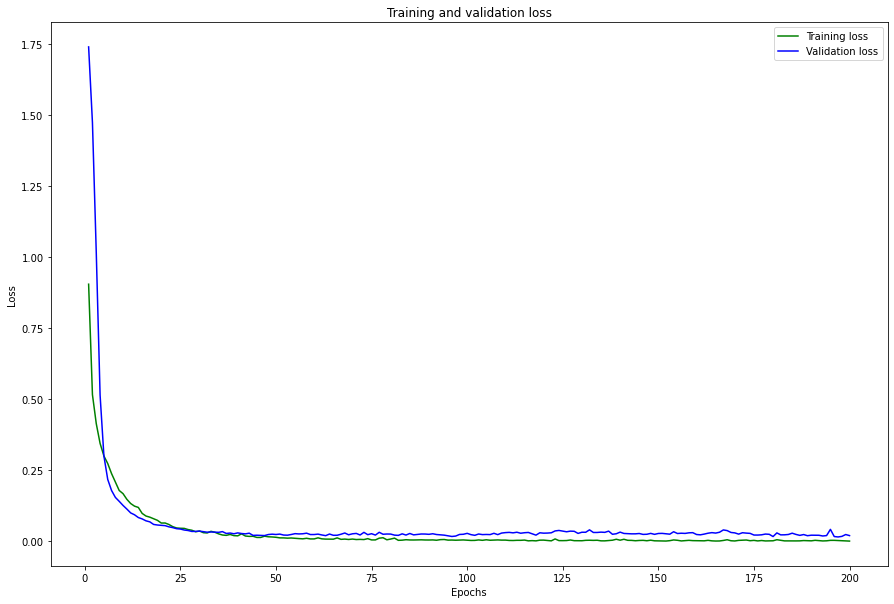

In [ ]:
plt.rcParams["figure.figsize"] = (15,10)

# graph the loss, the model above is configure to use "mean squared error" as the loss function
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Plotting accuracy for each epoch

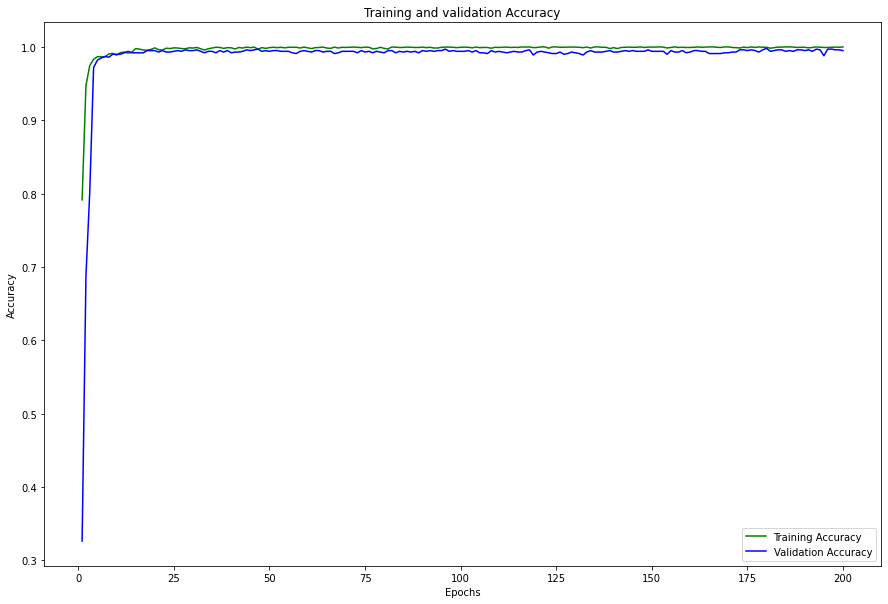

In [ ]:
plt.rcParams["figure.figsize"] = (15,10)

# graph the loss, the model above is configure to use "mean squared error" as the loss function
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)
plt.plot(epochs, train_acc, 'g', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
predictions = np.argmax(model.predict(x_test),axis = 1)
predictions = predictions.astype(int)
accuracy = np.mean(predictions == y_test)
precision = precision_score(y_test,predictions,average = 'weighted')
recall = recall_score(y_test,predictions,average = 'weighted')
f1 = f1_score(y_test,predictions,average = 'weighted')
conf_mat = confusion_matrix(y_test,predictions)
conf_mat = pd.DataFrame(conf_mat)
conf_mat.columns = activities
conf_mat.index = activities
print('accuracy:', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('f1_score: ', f1)
print('Confusion Matrix: \n', conf_mat)

accuracy: 0.9959839357429718
Precision:  0.9960180553078459
Recall:  0.9959839357429718
f1_score:  0.9959825495784982
Confusion Matrix: 
             asc_data  des_data  dance_data  jump_data  sit_data  stand_data  \
asc_data         181         0           0          0         0           0   
des_data           0       187           0          0         0           0   
dance_data         1         0         183          0         0           0   
jump_data          0         3           0        163         0           0   
sit_data           0         0           0          0       177           0   
stand_data         0         0           0          0         0         165   
walk_data          0         0           0          0         0           0   

            walk_data  
asc_data            0  
des_data            1  
dance_data          0  
jump_data           0  
sit_data            0  
stand_data          0  
walk_data         184  


In [ ]:
#code to convert deployable model - code is referred from IMU TinyML mheath note book used in class discussions
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model to disk
open("gesture_model.tflite", "wb").write(tflite_model)


# Convert the model to the TensorFlow Lite format with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# Define a generator function that provides our test data's x values
# as a representative dataset, and tell the converter to use it
def representative_dataset_generator():
    for value in x_test:
        yield [np.array(value, dtype=np.float32, ndmin=2)]
converter.representative_dataset = representative_dataset_generator
# Convert the model
quant_model = converter.convert()
open("quantized.tflite", "wb").write(quant_model)


import os
basic_model_size = os.path.getsize("gesture_model.tflite")
print("Model is %d bytes" % basic_model_size)
quantized_model_size = os.path.getsize("quantized.tflite")
print("Model is %d bytes" % quantized_model_size)

INFO:tensorflow:Assets written to: /tmp/tmpaxt6u432/assets


INFO:tensorflow:Assets written to: /tmp/tmpcyqnxo2m/assets


INFO:tensorflow:Assets written to: /tmp/tmpcyqnxo2m/assets
/usr/local/lib/python3.7/dist-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


Model is 280228 bytes
Model is 73424 bytes


In [ ]:
!apt-get install xxd

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  xxd
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 49.9 kB of archives.
After this operation, 201 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 xxd amd64 2:8.0.1453-1ubuntu1.8 [49.9 kB]
Fetched 49.9 kB in 0s (113 kB/s)
Selecting previously unselected package xxd.
(Reading database ... 155320 files and directories currently installed.)
Preparing to unpack .../xxd_2%3a8.0.1453-1ubuntu1.8_amd64.deb ...
Unpacking xxd (2:8.0.1453-1ubuntu1.8) ...
Setting up xxd (2:8.0.1453-1ubuntu1.8) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [ ]:
!echo "const unsigned char model[] = {" >model.h
!cat gesture_model.tflite | xxd -i      >> model.h
!echo "};"                              >> model.h

import os
model_h_size = os.path.getsize("model.h")
print(f"Header file, model.h, is {model_h_size:,} bytes.")

Header file, model.h, is 1,728,108 bytes.


In [ ]:
!echo "const unsigned char model[] = {" >model1.h
!cat quantized.tflite | xxd -i      >> model1.h
!echo "};"                              >> model1.h

import os
model_h_size = os.path.getsize("model1.h")
print(f"Header file, model1.h, is {model_h_size:,} bytes.")
print("\nOpen the side panel (refresh if needed). Double click model.h to download the file.")

Header file, model1.h, is 452,816 bytes.

Open the side panel (refresh if needed). Double click model.h to download the file.
